In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [3]:
df = pd.read_csv('./output/checkpoint_model_bert.csv', index_col=0)

In [4]:
df.head()

,model_output,labels
0,0.106708,1.0
1,0.008202,0.0
2,0.281923,0.0
3,0.048741,0.0
4,0.014424,0.0


In [6]:
fpr, tpr, thresholds = roc_curve(df['labels'], df['model_output'])
roc_auc = auc(fpr, tpr)

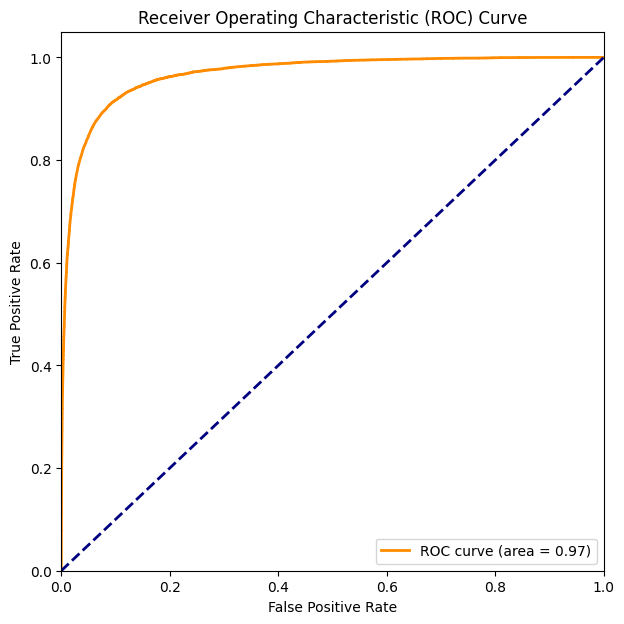

In [7]:
# Plot ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [8]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal threshold value:', optimal_threshold)

Optimal threshold value: 0.2062810361385345


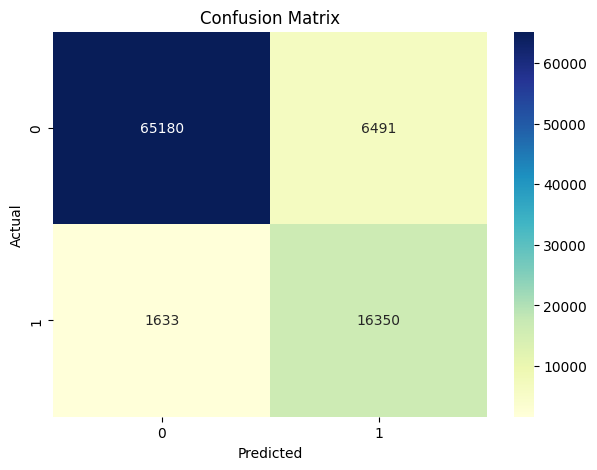

In [10]:
df['predictions'] = (df['model_output'] > optimal_threshold).astype(int)
conf_matrix = confusion_matrix(df['labels'], df['predictions'])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

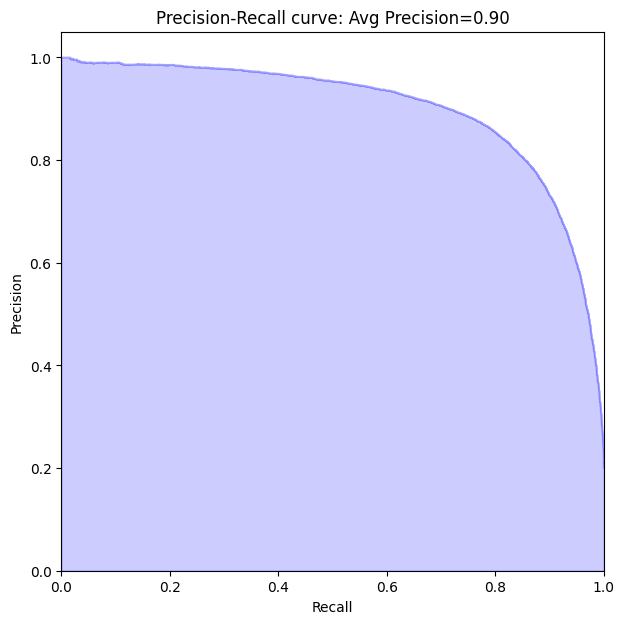

F1 Score: 0.8009994121105232


In [12]:
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score

# Calculate precision and recall
precision, recall, thresholds_pr = precision_recall_curve(df['labels'], df['model_output'])

# Calculate F1 score
f1 = f1_score(df['labels'], df['predictions'])

# Calculate average precision score
avg_precision = average_precision_score(df['labels'], df['model_output'])

# Plot Precision-Recall curve
plt.figure(figsize=(7, 7))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Avg Precision={0:0.2f}'.format(avg_precision))
plt.show()

print('F1 Score:', f1)